# **Lógica Fuzzy**
> A Lógica Fuzzy (Nebulosa ou Difusa), comumente tratada como uma extensão da lógica booleana, é uma lógica multivalorada capaz de capturar informações vagas, em geral descritas em uma linguagem natural, e convertê-las para um formato numérico.
* Um valor lógico difuso, conhecido por grau de pertinência, é um valor qualquer no intervalo [0, 1].
  * Determina o grau em que um determinado elemento pertence a um conjunto, permitindo uma transição gradual da falsidade para a verdade.
  * Não existe uma base formal para determinar esse valor que é escolhido experimentalmente. 

> As implementações da lógica difusa permitem que estados não precisos possam ser tratados por dispositivos de controle.
 * Desse modo, é possível avaliar conceitos não quantificáveis.
 * Casos práticos: 
  * Avaliar a temperatura (quente, morno, frio, ...)
  * Sentimento de felicidade (radiante, feliz, apático,
triste, ...)
# **Sistema Fuzzy**
> Sistemas são desenvolvidos para resolver problemas. Assim, precisamos do problema que pretendemos resolver através de um Sistema Fuzzy, o qual pode ser visto abaixo.

>**Problema:** 
Deve-se criar um sistema de inteligência artificial para controle de temperatura de um chuveiro utilizando a Lógica Fuzzy e Algoritmos Genéticos para otimização os parâmetros das funções de pertinência Fuzzy. 

> O projeto do Sistema Fuzzy será organizado conforme as três etapas do raciocínio fuzzy:
1.   Fuzzificação
2.   Inferência Fuzzy
3.   Defuzzificação
# **Fuzzificação**
> Etapa na qual as variáveis linguísticas são definidas de forma subjetiva, bem como as funções membro (funções de pertinência)

> Engloba:
* Análise do Problema
* Definição das Variáveis
* Definição das Funções de pertinência
* Criação das Regiões

> Na definição das funções de pertinência para cada variável, diversos tipos de espaço podem ser gerados:
* Triangular, Trapezoidal, Gaussiana, ...

> Assim, segundo o **problema** apresentado, estamos desenvolvendo um Sistema Fuzzy que modela a temperatura da água que sai do chuveiro com base na Vazão (V) e Potência Elétrica (P) do chuveiro. A V é um valor entre 1 e 8 l/min, a P entre 0 e 6000 W e a Temperatura de 0 a 60 ºC.
* Variáveis de Entrada:
  * Vazão:
    * Universo (intervalo de valores): [1, 8]
    * Conjuntos Fuzzy/Funções de Pertinência: Baixa, Média, Alta
  * Potência Elétrica:
    * Universo (intervalo de valores): [0, 6000]
    * Conjuntos Fuzzy/Funções de Pertinência: Baixa, Média, Alta
* Variáveis de Saída:
  * Temperatura:
    * Universo (intervalo de valores): [0, 60]
    * Conjuntos Fuzzy/Funções de Pertinência: Fria, Morna, Quente
 # **Inferência Fuzzy**
> Etapa na qual as proposições (regras) são definidas e depois são examinadas
paralelamente.

> Engloba:
* Definição das proposições
* Análise das regras
* Criação da região resultante

> Definição das Proposições para o Sistema Fuzzy de controle da validade.
* Base de Conhecimento/Regras
  * **SE** a temperatura é fria **E** umidade é baixa **ENTÃO** a validade é longa
  * **SE** a temperatura é quente **OU** umidade é alta **ENTÃO** a validade é curta
  * **SE** a umidade é média **ENTÃO** a validade é aceitável 
# **Defuzzificação**
> Etapa na qual as regiões resultantes são convertidas em valores para a variável de saída do sistema.




# **Algoritmos Genéticos**
> Algoritmos Genéticos são algoritmos de otimização global, baseados nos mecanismos de seleção natural e da genética. Eles empregam uma estratégia de busca paralela e estruturada, mas aleatória, que é voltada em direção ao reforço da busca de pontos de "alta aptidão", ou seja, pontos nos quais a função a ser minimizada (ou maximizada) tem valores relativamente baixos (ou altos).

> Apesar de aleatórios, eles não são caminhadas aleatórias não direcionadas, pois exploram informações históricas para encontrar novos pontos de busca onde são esperados melhores desempenhos. Isto é feito através de processos iterativos, onde cada teração é chamada de geração.

> Durante cada iteração, os princípios de seleção e reprodução são aplicados a uma população de candidatos que pode variar, dependendo da complexidade do problema e dos recursos computacionais disponíveis. Através da seleção, se determina quais indivíduos conseguirão se reproduzir, gerando um número determinado de descendentes para a próxima geração, com uma probabilidade determinada pela seu índice de aptidão. Em outras palavras, os indivíduos com maior adaptação relativa têm maiores chances de se reproduzir.

> O ponto de partida para a utilização de Algoritmos Genéticos, como ferramenta para solução de problemas, é a representação destes problemas de maneira que os Algoritmos Genéticos possam trabalhar adequadamente sobre eles. A maioria das representações são genotípicas, utilizam vetores de tamanho finito em um alfabeto finito.

# **Instalando o Pacote Fuzzy**

In [2]:
!pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 5.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=4cb9b30a2076ac01d998ee407adcfb335b8f700238c159a386ee0a32e1950c39
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


# **Fuzzificação do Problema**

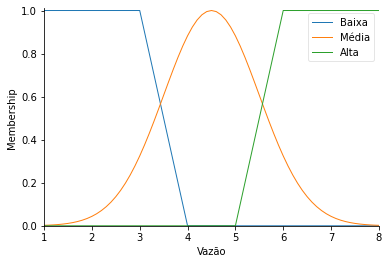

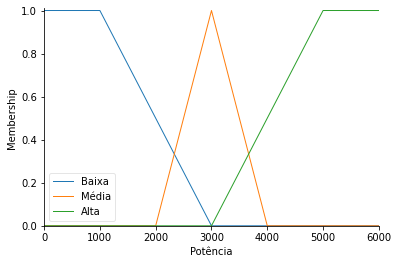

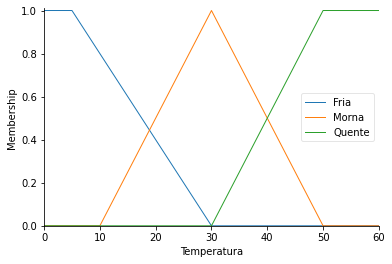

In [3]:
# [2] Fuzzificação
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Criando as variáveis do problema
vazao = ctrl.Antecedent(np.arange(1, 8.1, 0.1), 'Vazão')
potencia = ctrl.Antecedent(np.arange(0, 6001, 100), 'Potência')
temperatura = ctrl.Consequent(np.arange(0, 61, 1), 'Temperatura')

# Criando as funções de pertinência para a vazão
vazao['Baixa'] = fuzz.trapmf(vazao.universe, [1, 1, 3, 4])
vazao['Média'] = fuzz.gaussmf(vazao.universe, 4.5, 1)
vazao['Alta'] = fuzz.trapmf(vazao.universe, [5, 6, 8, 8.1])

# Criando as funções de pertinência para a potência
potencia['Baixa'] = fuzz.trapmf(potencia.universe, [0, 0, 1000, 3000])
potencia['Média'] = fuzz.trimf(potencia.universe, [2000, 3000, 4000])
potencia['Alta'] = fuzz.trapmf(potencia.universe, [3000, 5000, 6000, 6000])

# Criando as funções de pertinência para temperatura
temperatura['Fria'] = fuzz.trapmf(temperatura.universe, [0, 0, 5, 30])
temperatura['Morna'] = fuzz.trimf(temperatura.universe, [10, 30, 50])
temperatura['Quente'] = fuzz.trapmf(temperatura.universe, [30, 50, 60, 60])

# Visualizando as funções de pertinência para cada variável
vazao.view()
potencia.view()
temperatura.view()

# **Inferência Fuzzy e Defuzzificação**

Digite a vazão (l/min): 4
Digite a potência (W): 4000
A temperatura é de 47.000000 ºC


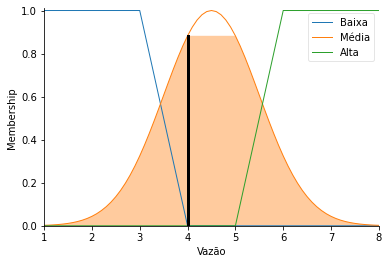

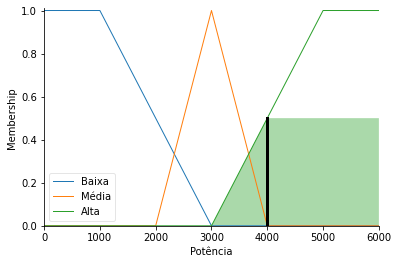

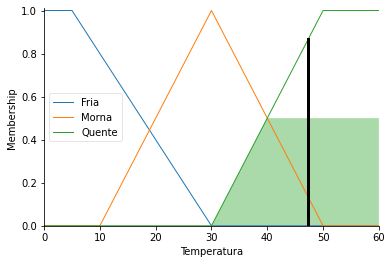

In [4]:
# [3] Inferência Fuzzy e Defuzzificação

# Base de Conhecimento/Regras
rule1 = ctrl.Rule(vazao['Baixa'] & potencia['Baixa'], temperatura['Morna'])
rule2 = ctrl.Rule(vazao['Baixa'] & potencia['Média'], temperatura['Quente'])
rule3 = ctrl.Rule(vazao['Baixa'] & potencia['Alta'], temperatura['Quente'])
rule4 = ctrl.Rule(vazao['Média'] & potencia['Baixa'], temperatura['Fria'])
rule5 = ctrl.Rule(vazao['Média'] & potencia['Média'], temperatura['Morna'])
rule6 = ctrl.Rule(vazao['Média'] & potencia['Alta'], temperatura['Quente'])
rule7 = ctrl.Rule(vazao['Alta'] & potencia['Baixa'], temperatura['Fria'])
rule8 = ctrl.Rule(vazao['Alta'] & potencia['Média'], temperatura['Fria'])
rule9 = ctrl.Rule(vazao['Alta'] & potencia['Alta'], temperatura['Morna'])

# Sistema Fuzzy e Simulação
temperatura_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
temperatura_simulador = ctrl.ControlSystemSimulation(temperatura_ctrl)

# Entranda da vazão
while True:
  vaz = float(input('Digite a vazão (l/min): '))
  if(vaz<1 or vaz>8):
    print('A vazão deve estar no intervalo [1, 8]')
    continue
  temperatura_simulador.input['Vazão'] = vaz
  break

# Entrada da Potência Elétrica  
while True:
  p = float(input('Digite a potência (W): '))
  if(p<0 or p>6000):
    print('A potência elétrica deve estar no intervalo [0, 6000]')
    continue
  temperatura_simulador.input['Potência'] = p
  break

# Computando o resultado (Inferência Fuzzy + Defuzzificação)
temperatura_simulador.compute()
print('A temperatura é de %f ºC' % round(temperatura_simulador.output['Temperatura']))

# Visualizando as regiões
vazao.view(sim=temperatura_simulador)
potencia.view(sim=temperatura_simulador)
temperatura.view(sim=temperatura_simulador)


# **Controle de Temperatura**




O que deseja fazer (Aumentar Temperatura=1, Diminuir Temperatura=2, Manter temperatura=3): 1

A temperatura foi aumentada

A potencia atual é de 4500 :

O que deseja fazer (Aumentar Temperatura=1, Diminuir Temperatura=2, Manter temperatura=3): 1

A temperatura foi aumentada

A potencia atual é de 5000 :

O que deseja fazer (Aumentar Temperatura=1, Diminuir Temperatura=2, Manter temperatura=3): 1

A temperatura foi aumentada

A potencia atual é de 5500 :

O que deseja fazer (Aumentar Temperatura=1, Diminuir Temperatura=2, Manter temperatura=3): 1

A temperatura foi aumentada

A potencia atual é de 6000 :

O que deseja fazer (Aumentar Temperatura=1, Diminuir Temperatura=2, Manter temperatura=3): 1

A potencia máxima foi atingida, a vazão foi diminuida

A vazão atual é de 3.5 :

O que deseja fazer (Aumentar Temperatura=1, Diminuir Temperatura=2, Manter temperatura=3): 1

A potencia máxima foi atingida, a vazão foi diminuida

A vazão atual é de 3.0 :

O que deseja fazer (Aumentar Temperat

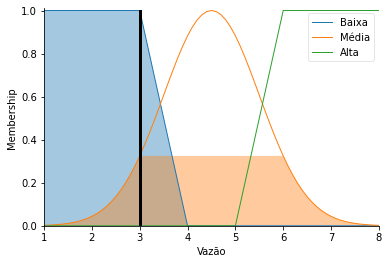

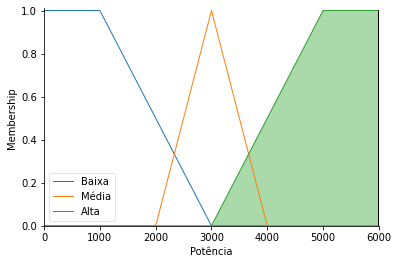

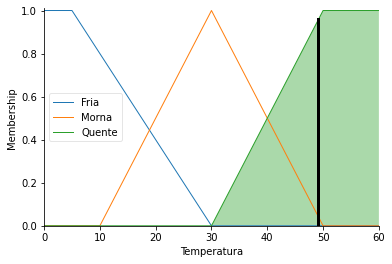

In [5]:
# Temperatura da água desejada  
while True:
  temp = int(input('\nO que deseja fazer (Aumentar Temperatura=1, Diminuir Temperatura=2, Manter temperatura=3): '))
  if(temp<1 or temp>3):
    print('\nA temperatura da água deve estar no intervalo [1, 3]')
    continue
  
  if(temp==1):
    if(p>=6000):
      if(vaz<1):
        print('\nA vazão ja encontra-se no mínimo')
      else:
        p=6000
        vaz-=0.5
        print('\nA potencia máxima foi atingida, a vazão foi diminuida')
        print('\nA vazão atual é de %.1f :' %vaz)     
    else:
      p+=500
      temperatura_simulador.input['Potência'] = p
      print('\nA temperatura foi aumentada')
      print('\nA potencia atual é de %.0f :' %p)
  elif(temp==2):
    if(p<=0):
      p=0
      print('\nA potencia encontra-se no valor minimo')
    else:
      p-=500
      temperatura_simulador.input['Potência'] = p
      print('\nA temperatura foi reduzida')
      print('\nA potencia atual é de %.0f :' %p )
  elif(temp==3):
    print('\nTemperatura ideal alcançada')
    break

temperatura_simulador.input['Potência'] = p
temperatura_simulador.input['Vazão'] = vaz

# Computando o resultado (Inferência Fuzzy + Defuzzificação)
temperatura_simulador.compute()
print('A temperatura é de %f ºC' % round(temperatura_simulador.output['Temperatura']))

# Visualizando as regiões
vazao.view(sim=temperatura_simulador)
potencia.view(sim=temperatura_simulador)
temperatura.view(sim=temperatura_simulador)